# Portugese Bank Telemarketing Campaign Solution

## Problem Statement :

The Portuguese Bank had run a telemarketing campaign in the past, making sales calls for a term-deposit product. Whether a prospect had bought the product or not is mentioned in the column named 'response'.

The marketing team wants to launch another campaign, and they want to learn from the past one. You, as an analyst, decide to build a supervised model in Python and achieve the following goals:

·   Reduce the marketing cost by X% and acquire Y% of the prospects (compared to random calling), where X and Y are to be maximized

·   Present the financial benefit of this project to the marketing team

## Solution Code:


### Importing the Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy import integrate


### Importing the Dataset

In [2]:
# X = Matrix of Features , y = Dependent Variable Vector
dataset=pd.read_csv('bank-additional-full.csv',delimiter=";")
X=dataset.iloc[:,:-1].values
y=dataset.iloc[:,20].values

### Data Preprocessing

#### Encoding Categorical Data

In [3]:
#Label Encoding of Categorical Data present in Matrix of Features
from sklearn.preprocessing import LabelEncoder
labelencoder_X=LabelEncoder()
for i in range(9):
  X[:,i+1]=labelencoder_X.fit_transform(X[:,i+1])
X[:,14]=labelencoder_X.fit_transform(X[:,14])


In [4]:
#Label Encoding of output variable 
labelencoder_Y=LabelEncoder()
y=labelencoder_Y.fit_transform(y)


In [5]:
#One Hot Encoding of categorical Data present in matrix of features
from sklearn.preprocessing import OneHotEncoder
onehotencoder= OneHotEncoder(categorical_features=[1,2,3,4,5,6,7,8,9,14])
X=onehotencoder.fit_transform(X).toarray()

### Splitting the dataset into the Training set and Test set

In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)



### Feature Scaling using StandardScaler

In [7]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)



## Fitting Random Forest Classification to the Training set

In [8]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 35, criterion = 'entropy', random_state = 0)
classifier.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=35, n_jobs=1,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

### Predicting the Test set results

In [9]:
y_pred = classifier.predict(X_test)

### Making the Confusion Matrix

In [10]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

# CAP(Cumulative Accuracy Profile) Curve Function 

In [11]:
def capcurve(y_values, y_preds_proba):
    num_pos_obs = np.sum(y_values)
    num_count = len(y_values)
    rate_pos_obs = float(num_pos_obs) / float(num_count)
    ideal = pd.DataFrame({'x':[0,rate_pos_obs,1],'y':[0,1,1]})
    xx = np.arange(num_count) / float(num_count - 1)
    
    y_cap = np.c_[y_values,y_preds_proba]
    y_cap_df_s = pd.DataFrame(data=y_cap)
    y_cap_df_s = y_cap_df_s.sort_values([1], ascending=False).reset_index(level = y_cap_df_s.index.names, drop=True)
    
    print(y_cap_df_s.head(20))
    
    yy = np.cumsum(y_cap_df_s[0]) / float(num_pos_obs)
    yy = np.append([0], yy[0:num_count-1]) #add the first curve point (0,0) : for xx=0 we have yy=0
    
    percent = 0.5
    row_index = int(np.trunc(num_count * percent))
    
    val_y1 = yy[row_index]
    val_y2 = yy[row_index+1]
    if val_y1 == val_y2:
        val = val_y1*1.0
    else:
        val_x1 = xx[row_index]
        val_x2 = xx[row_index+1]
        val = val_y1 + ((val_x2 - percent)/(val_x2 - val_x1))*(val_y2 - val_y1)
    
    sigma_ideal = 1 * xx[num_pos_obs - 1 ] / 2 + (xx[num_count - 1] - xx[num_pos_obs]) * 1
    sigma_model = integrate.simps(yy,xx)
    sigma_random = integrate.simps(xx,xx)
    
    ar_value = (sigma_model - sigma_random) / (sigma_ideal - sigma_random)
    
    fig, ax = plt.subplots(nrows = 1, ncols = 1)
    ax.plot(ideal['x'],ideal['y'], color='grey', label='Perfect Model')
    ax.plot(xx,yy, color='red', label='User Model')
    ax.plot(xx,xx, color='blue', label='Random Model')
    ax.plot([percent, percent], [0.0, val], color='green', linestyle='--', linewidth=1)
    ax.plot([0, percent], [val, val], color='green', linestyle='--', linewidth=1, label=str(val*100)+'% of positive obs at '+str(percent*100)+'%')
    
    plt.xlim(0, 1.02)
    plt.ylim(0, 1.25)
    plt.title("CAP Curve - a_r value ="+str(ar_value))
    plt.xlabel('% of the data')
    plt.ylabel('% of positive obs')
    plt.legend()
    plt.show()
    

## Generating the CAP Curve :

      0         1
0   1.0  1.000000
1   1.0  0.971429
2   1.0  0.971429
3   1.0  0.971429
4   1.0  0.971429
5   1.0  0.971429
6   1.0  0.942857
7   1.0  0.942857
8   1.0  0.942857
9   1.0  0.942857
10  1.0  0.942857
11  1.0  0.942857
12  1.0  0.942857
13  1.0  0.942857
14  1.0  0.942857
15  1.0  0.942857
16  1.0  0.942857
17  1.0  0.914286
18  1.0  0.914286
19  1.0  0.914286


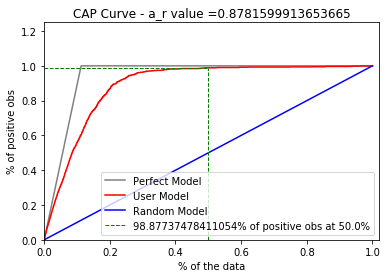

In [12]:
%matplotlib inline
y_pred_proba = classifier.predict_proba(X_test)
capcurve(y_values=y_test, y_preds_proba=y_pred_proba[:,1])

## Solution Description and Results :

### Results :

#### i) Reduction in Marketing Cost X = 50 %

#### ii) Acquired Percentage of the Prospects Y = 98.877 %

### Description :

Step 1 : Imported the Following Libraries - > pandas , numpy , matplotlib ,scipy

Step 2 : Imported the Dataset and Created the Matrix of Features and Vector of Dependent            Variable

Step 3 : Data Preprocessing -> Label Encoding and OneHot Encoding of Categorical Data

Step 4 : Splitting the Dataset into Training and Test Set

Step 5 : Feature Scaling

Step 6 : Making the Confusion Matrix

Step 7 : Defining the CAP (Cumulative Accuracy Profile) Curve Function

#### Step 8 : Generating the Cumulative Accuracy Profile Curve

In the Cumulative Accuracy Profile Curve Shown in the figure above , we can see three different curves. 

i)The blue line represents the random model ie., when we send out the marketing scheme to     all the customers.

ii)The grey lin represents the ideal model ie., when we send out the marketing scheme to      only those customers who will eventually give a positive response in the future ie., 
   100% conversion rate (ideal).

#### iii) The red curve represents our model. Here we reduce the marketing costs by 50 % and                                  achieve 98.877 % of the prospects compared to random calling.

## Summary 

### As we can see the marketing team can now target a specific set of customers based on this model and reduce 50% of the total expenditure (random model) and achieve 98.877 % of the prospects compared to the random calling method.